# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We are going to use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student name: Pagano Alice
    
ID: 1236916

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 1236916
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

#for i in range(0,10):
#    print('Size:',y_train[y_train == i].shape[0])

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [54 49 52 58 51 48 42 47 60 39]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


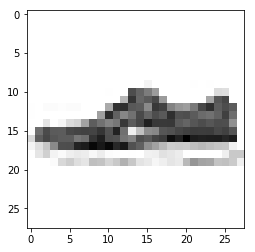

LABEL: 5
INPUT:


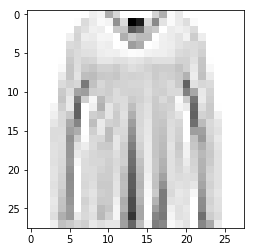

LABEL: 2
INPUT:


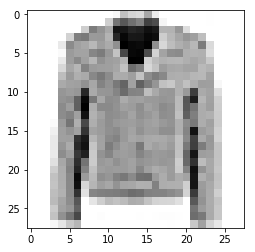

LABEL: 4
INPUT:


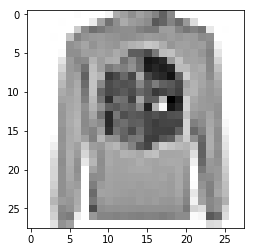

LABEL: 2


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,5000)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.0005, 0.005, 0.05, 0.5, 5, 50, 500]}

svc = SVC(kernel = 'linear')
clf_linear = GridSearchCV(svc, parameters, cv = 4)

clf_linear.fit(X_train, y_train)

#run linear SVM
#for parameter in parameters['C']:
#    svc = SVC(kernel ='linear', C = parameter).fit(X_train, y_train)
#print(clf.predict(X_train))
print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
print(clf_linear.best_params_)

print("Score with best parameters:")
print(clf_linear.best_score_)

print("All scores on the grid:")
#print(clf.cv_results_)
means_linear = clf_linear.cv_results_['mean_test_score']
print(means_linear)

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 0.05}
Score with best parameters:
0.768
All scores on the grid:
[0.294 0.718 0.768 0.752 0.752 0.752 0.752]


/Users/alicepagano/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel

degree = 2
svc = SVC(kernel = 'poly', degree = degree)
clf_p2 = GridSearchCV(svc, parameters, cv = 4)

clf_p2.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
print(clf_p2.best_params_)

print("Score with best parameters:")
print(clf_p2.best_score_)

print("All scores on the grid:")
#print(clf.cv_results_)
means_p2 = clf_p2.cv_results_['mean_test_score']
print(means_p2)

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.05, 'gamma': 0.5}
Score with best parameters:
0.73
All scores on the grid:
[0.7  0.73 0.73 0.72 0.73 0.73 0.73 0.73 0.73]


/Users/alicepagano/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## TO DO 3

Now let's try a higher degree for the polynomial kernel.

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel

degree = 3
svc = SVC(kernel = 'poly', degree = degree)
clf_p3 = GridSearchCV(svc, parameters, cv = 4)

clf_p3.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
print(clf_p3.best_params_)

print("Score with best parameters:")
print(clf_p3.best_score_)

print("All scores on the grid:")
#print(clf.cv_results_)
means_p3 = clf_p3.cv_results_['mean_test_score']
print(means_p3)

RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found:
{'C': 0.5, 'gamma': 0.05}
Score with best parameters:
0.71
All scores on the grid:
[0.684 0.704 0.704 0.71  0.704 0.704 0.704 0.704 0.704]


/Users/alicepagano/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel

svc = SVC(kernel = 'rbf')
clf_rbf = GridSearchCV(svc, parameters, cv = 4)

clf_rbf.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(clf_rbf.best_params_)

print("Score with best parameters:")
print(clf_rbf.best_score_)

print("All scores on the grid:")
#print(clf.cv_results_)
means_rbf = clf_rbf.cv_results_['mean_test_score']
print(means_rbf)

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 5, 'gamma': 0.005}
Score with best parameters:
0.77
All scores on the grid:
[0.712 0.644 0.12  0.12  0.77  0.724 0.14  0.12  0.766 0.724 0.14  0.12
 0.766 0.724 0.14  0.12 ]


/Users/alicepagano/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## TO DO5
What do you observe when using RBF and polynomial kernels on this dataset ?

### ANSWER TO THE QUESTION

RBF kernel results as the best one. For the polynomial kernels, we observe that the best is the linear one and that the score values decrease increasing the degree of the polynomial. 

## TO DO 6
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM = clf_rbf

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.058000
Best SVM test error: 0.209630


## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [199 214 191 201 191 179 218 191 195 221]


Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the TO DO 9 cell below.

### TO DO 7

In [14]:
#get training and test error for the best SVM model from CV

# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel

svc = SVC(kernel = 'rbf')
clf_rbf = GridSearchCV(svc, parameters, cv = 4)

clf_rbf.fit(X_train, y_train)

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
print(clf_rbf.best_params_)

print("Score with best parameters:")
print(clf_rbf.best_score_)

print("All scores on the grid:")
#print(clf.cv_results_)
means_rbf = clf_rbf.cv_results_['mean_test_score']
print(means_rbf)


#get training and test error for the best SVM model from CV
best_SVM = clf_rbf

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)


RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 5, 'gamma': 0.005}
Score with best parameters:
0.8345
All scores on the grid:
[0.771  0.766  0.1105 0.1105 0.8345 0.8125 0.1705 0.1105 0.822  0.8125
 0.1705 0.1105 0.822  0.8125 0.1705 0.1105]
Best SVM training error: 0.062000
Best SVM test error: 0.167466


Just for comparison, let's also use logistic regression (with standard parameters from scikit-learn, i.e. some regularization is included).

### TO DO 8 Try first without regularization (use a very large large C)

In [15]:
from sklearn import linear_model
from sklearn import metrics

reg = linear_model.LogisticRegression(C = 1e12, solver='newton-cg')
reg.fit(X_train, y_train)

# predictions on training data 
y_training_prediction_LR = reg.predict(X_train)

# predictions on test data 
y_test_prediction_LR =reg.predict(X_test)

training_error = 1 - metrics.accuracy_score(y_train, y_training_prediction_LR)
test_error = 1 - metrics.accuracy_score(y_test, y_test_prediction_LR)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

/Users/alicepagano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.239310


### TO DO 9 Then use also some regularization 

In [16]:
#define the model using LogisticRegressionCV passing an appropriate solver, cv value, and choice of penalty
reg = linear_model.LogisticRegressionCV(Cs=[1*np.power(10,i) for i in range(0,10,1)], solver='newton-cg',cv=10)

#fit the model on training data
reg.fit(X_train, y_train)

# the attribute 'Cs_' contains ALL the values of C evaluated in cross-validation;
# let's print them
print("Values of parameter C tried in 10-fold Cross-Validation: {}".format( reg.Cs_ ))

# the attribute 'scores_' contains the accuracy obtained in each fold, for each value 
# of C tried; we now compute the average accuracy across the 10 folds

CV_accuracies = np.divide(np.sum(reg.scores_[1],axis=0),10)

# let's print the average accuracies obtained for the various values of C

print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))

# the attribute 'C_' contains the best value of C as identified by cross-validation;
# let's print it

print("Best value of parameter C according to 10-fold Cross-Validation: {}".format( reg.C_[0] ))

# let's store the best CV accuracy, and then print it
#print(regL2.scores_[1])
reg_best_CV_accuracy = np.max(reg.scores_[1])
print("10-fold Cross-Validation accuracies obtained with the best value of parameter C: {}".format( reg_best_CV_accuracy ))

#define the model using the best C and an appropriate solver

reg_full = linear_model.LogisticRegression(C=1,solver='newton-cg')

#fit the model using the best C on the entire training set

reg_full.fit(X_train,y_train)

# predictions on training data 
y_training_prediction_LR_regularized = reg.predict(X_train)

# predictions on test data 
y_test_prediction_LR_regularized =reg.predict(X_test)

training_error = 1 - metrics.accuracy_score(y_train, y_training_prediction_LR_regularized)
test_error = 1 - metrics.accuracy_score(y_test, y_test_prediction_LR_regularized)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

/Users/alicepagano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Values of parameter C tried in 10-fold Cross-Validation: [         1         10        100       1000      10000     100000
    1000000   10000000  100000000 1000000000]
Accuracies obtained for the different values of C with 10-fold Cross-Validation: [0.99597713 0.9969847  0.99648718 0.99648718 0.99648718 0.99648718
 0.99648718 0.99648718 0.99648718 0.99648718]
Best value of parameter C according to 10-fold Cross-Validation: 1
10-fold Cross-Validation accuracies obtained with the best value of parameter C: 1.0


/Users/alicepagano/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best regularized logistic regression training error: 0.033000
Best regularized logistic regression test error: 0.187914


## TO DO 10
Compare and discuss:
- the results from SVM with m=500 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression with and without regularization

### ANSWER TO THE QUESTION

For the SVM we have:

m |Score with best parameters | Best SVM training error | Best SVM test error
                           ---|-----|------------|--------------
500  | 0.79 | 0.054000 | 0.211748
2000 | 0.819 |0.000000 | 0.172776


For the logistic regression: 

 regularization |  Best SVM training error | Best SVM test error 
   ---|------------|--------------
without  | 0.000000 | 0.232155
with   |0.029500 | 0.186345

I can see that for the SVM increasing the dataset the training error goes to zero. It is a "strange" result, indeed what I expected was that the training error would not dramatically decreased as obtained. Maybe it is due to an instability given by the small dataset used. 
The test error improved increasing the dataset.
For the logistic regression we obtain that the training error without regularization is zero, while the one with regularization is not zero. Maybe with the regularization we have partially solved the instability of the data. The test error improved adding regularization.


## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [17]:
LR_prediction = reg_full.predict(X_test)
SVM_prediction = clf_rbf.predict(X_test)

missclassified = []
for i in range(0,len(y_test)):
    if LR_prediction[i] != y_test[i] and SVM_prediction[i] == y_test[i]:
        missclassified.append(i)

print(missclassified)
print(len(missclassified))

[8, 27, 45, 53, 91, 131, 140, 146, 171, 194, 205, 218, 285, 337, 373, 374, 399, 419, 423, 432, 435, 453, 478, 486, 490, 506, 534, 539, 545, 581, 666, 667, 669, 723, 751, 768, 775, 782, 783, 797, 798, 799, 863, 881, 890, 896, 906, 929, 945, 958, 968, 973, 995, 1001, 1044, 1066, 1072, 1073, 1084, 1091, 1126, 1184, 1185, 1186, 1203, 1205, 1220, 1225, 1257, 1269, 1286, 1288, 1310, 1400, 1413, 1415, 1444, 1461, 1472, 1486, 1520, 1526, 1542, 1558, 1576, 1581, 1597, 1622, 1624, 1631, 1640, 1658, 1662, 1689, 1707, 1733, 1736, 1750, 1839, 1845, 1847, 1856, 1870, 1882, 1906, 1909, 1927, 1946, 2030, 2036, 2059, 2068, 2069, 2074, 2078, 2081, 2084, 2098, 2104, 2119, 2125, 2129, 2133, 2162, 2191, 2248, 2303, 2316, 2337, 2345, 2367, 2369, 2400, 2417, 2484, 2511, 2527, 2574, 2620, 2627, 2630, 2653, 2660, 2694, 2718, 2774, 2796, 2797, 2805, 2807, 2825, 2851, 2868, 2896, 2904, 2932, 2934, 2958, 2987, 2989, 3004, 3019, 3112, 3136, 3145, 3156, 3224, 3229, 3275, 3294, 3311, 3321, 3337, 3377, 3381, 3390, 34

In [18]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

3084
Missclassified sample index: 8
LR prediction label: 6
SVM prediction label: 2
INPUT:


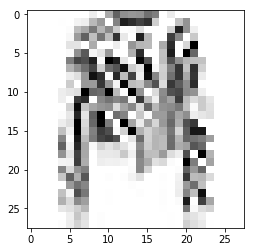

LABEL: 2
Missclassified sample index: 27
LR prediction label: 3
SVM prediction label: 1
INPUT:


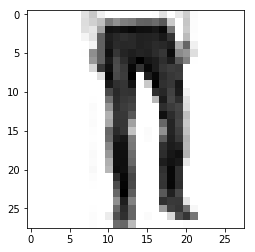

LABEL: 1
Missclassified sample index: 45
LR prediction label: 7
SVM prediction label: 9
INPUT:


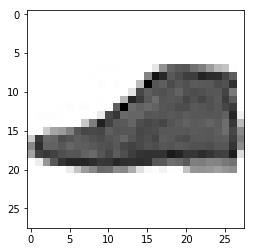

LABEL: 9
Missclassified sample index: 53
LR prediction label: 5
SVM prediction label: 7
INPUT:


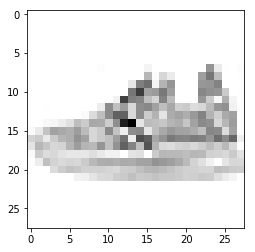

LABEL: 7
Missclassified sample index: 91
LR prediction label: 4
SVM prediction label: 3
INPUT:


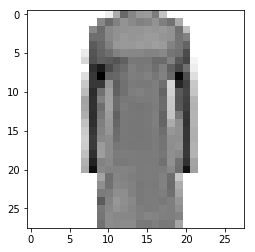

LABEL: 3
Missclassified sample index: 131
LR prediction label: 4
SVM prediction label: 2
INPUT:


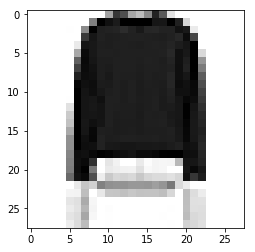

LABEL: 2
Missclassified sample index: 140
LR prediction label: 7
SVM prediction label: 5
INPUT:


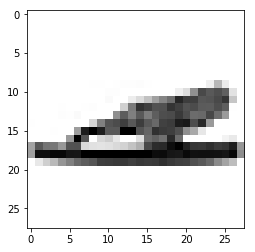

LABEL: 5
Missclassified sample index: 146
LR prediction label: 5
SVM prediction label: 9
INPUT:


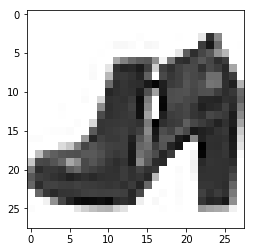

LABEL: 9


In [19]:
print(len(missclassified))

for index in missclassified[0:8]:
    print('Missclassified sample index:', index)
    print('LR prediction label:', LR_prediction[index])
    print('SVM prediction label:', SVM_prediction[index])
    plot_input(X_test,y_test,index)

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [20]:
from sklearn.metrics import confusion_matrix

# for better aligned printing of confusion matrix use floatmode='fixed' (not supported in all versions of Python)
np.set_printoptions(precision=2, suppress=True) 

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5801 5786 5809 5799 5809 5821 5782 5809 5805 5779]

 Confusion matrix SVM  
 
 [[4566    2   57  405   12    6  703    0   48    2]
 [  29 5473   62  193    6    0   21    0    2    0]
 [  76    4 4123   60  907    3  611    0   25    0]
 [ 175   20   70 5153  108    0  250    0   23    0]
 [  18    4  415  397 4416    3  538    0   17    1]
 [   9    1   15   10    0 5199   10  392   38  147]
 [ 900    4  683  178  595    3 3343    0   74    2]
 [   0    0    0    0    0  297    0 5087   11  414]
 [  38    2   42   28   18   50  139   28 5449   11]
 [   1    0    5   10    1  106    5  170    3 5478]]

 Confusion matrix SVM (normalized)   
 
 [[0.79 0.   0.01 0.07 0.   0.   0.12 0.   0.01 0.  ]
 [0.01 0.95 0.01 0.03 0.   0.   0.   0.   0.   0.  ]
 [0.01 0.   0.71 0.01 0.16 0.   0.11 0.   0.   0.  ]
 [0.03 0.   0.01 0.89 0.02 0.   0.04 0.   0.   0.  ]
 [0.   0.   0.07 0.07 0.76 0.   0.09 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.89 0.   0.07 0.0

## TO DO 12
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

### ANSWER TO THE QUESTION
The accuracy of each class depends on the fact that some classes are easier classifed as others because of the similiarity of the images. For example the trousers are the best one classified because they are the most different images with respect for example the dress, the t-shirt etc.
The t-shirt are the worst classified because they are similar to most of other classes.
